# Import libraries

In [1]:
import  pandas as pd
import warnings
warnings.filterwarnings('ignore')
import missingno as msn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Exracting dataset

In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')

let's see data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


you can see columns and also shape(shape can help us to see how many columns and rows exist)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


First of all we can see null values of columns using missingno matrix 

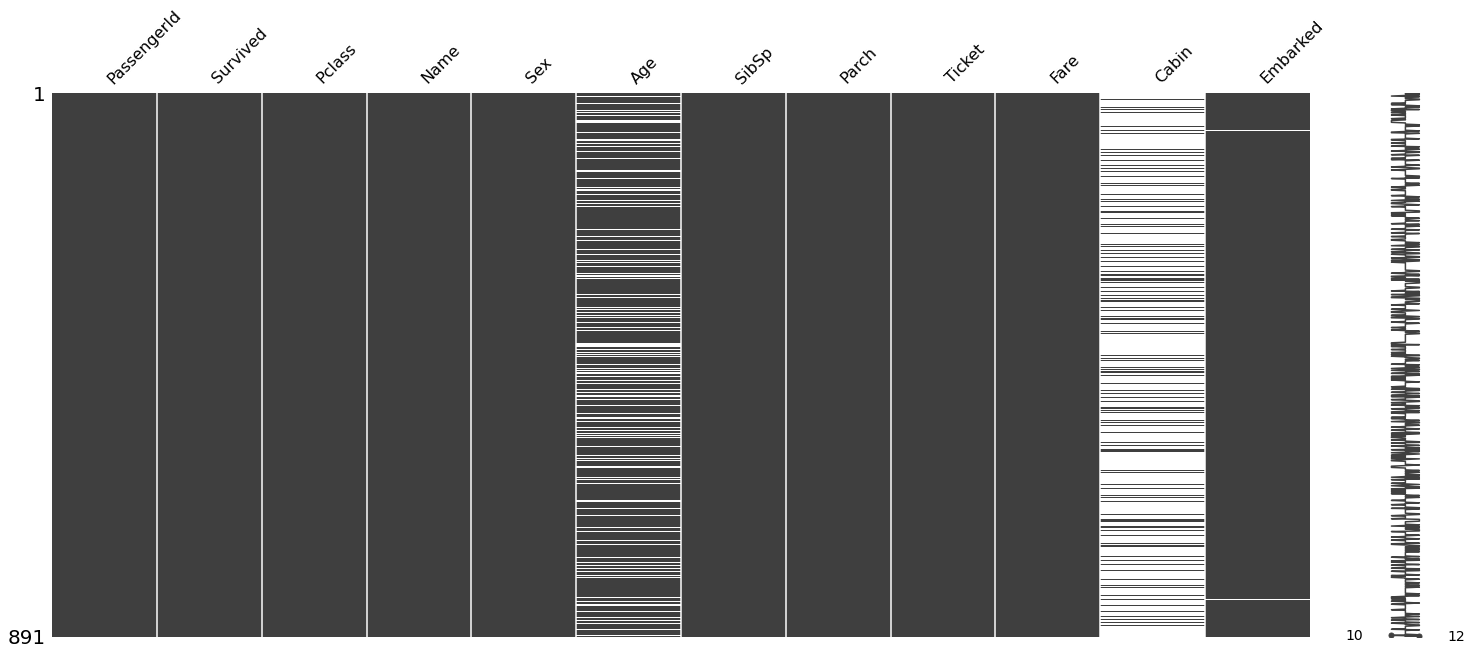

In [7]:
msn.matrix(df)
plt.show()

then we can multiply all null values of columns using sum

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Also we can see null values using missingno bar

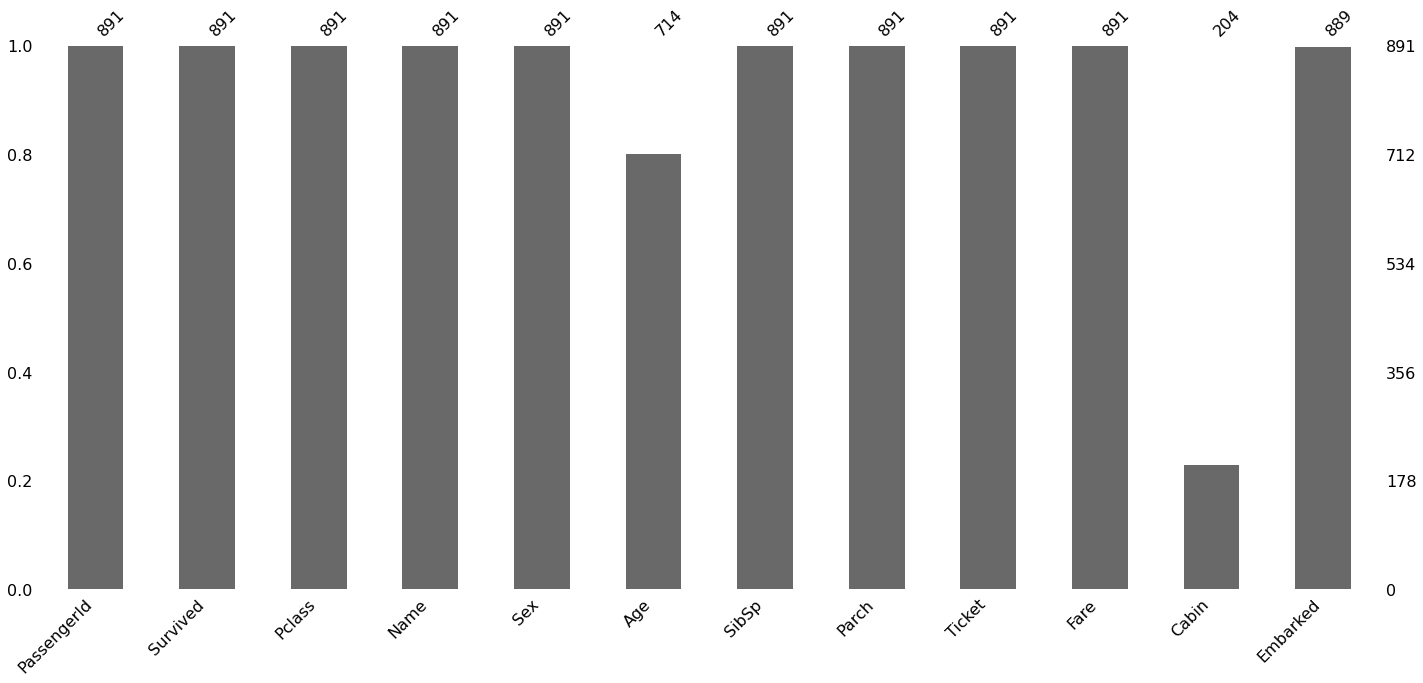

In [9]:
msn.bar(df)
plt.show()

and we can find the percentage of null values of columns like that

In [10]:
df.isnull().sum()/df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

As you see 'cabin' column has many null values ,let's drop this column 

In [11]:
df.drop('Cabin', axis=1, inplace=True)

In [12]:
df_copy=df.copy()

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


as you see the 'Cabin' column has dropped

we can count null values of columns like that

In [14]:
df['Age'].isnull().sum()

177

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
df['Age'].isnull().sum()

177

Let's describe data to see mean ,std,min,max and other values

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Data visualization

In [18]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

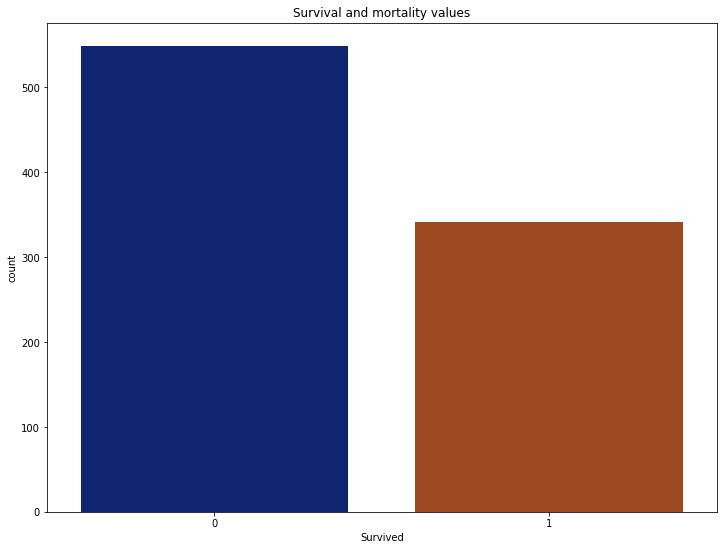

In [19]:
plt.figure(figsize=(12,9))
sns.set_palette('dark')
sns.countplot(x='Survived',data=df)
plt.title('Survival and mortality values')
plt.show()

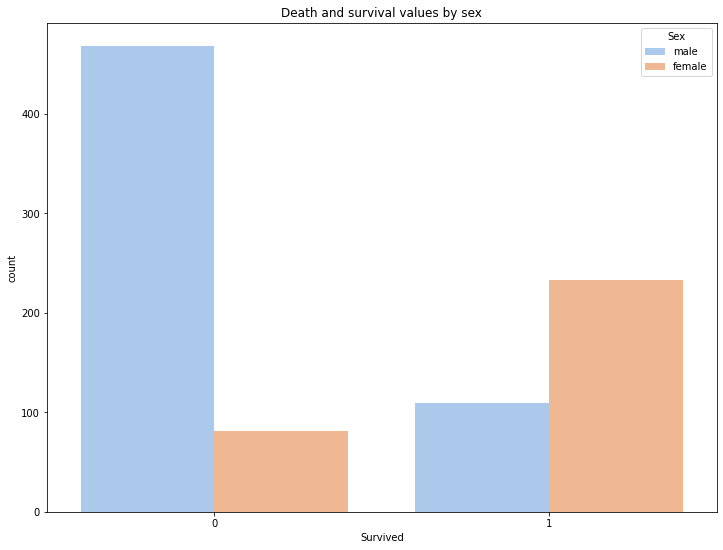

In [20]:
plt.figure(figsize=(12,9))
sns.set_palette('pastel')
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title('Death and survival values by sex')
plt.show()

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


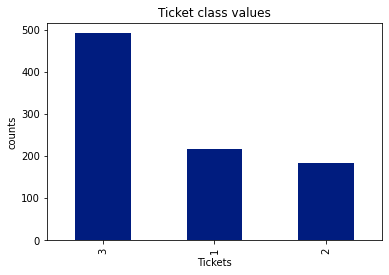

In [22]:
sns.set_palette('dark')
df['Pclass'].value_counts().plot.bar()
plt.title('Ticket class values')
plt.xlabel('Tickets')
plt.ylabel('counts')
plt.show()

In [23]:
df['Name'].value_counts().sum()

891

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
ticket_class=df['Pclass'].value_counts()
print(ticket_class)

3    491
1    216
2    184
Name: Pclass, dtype: int64


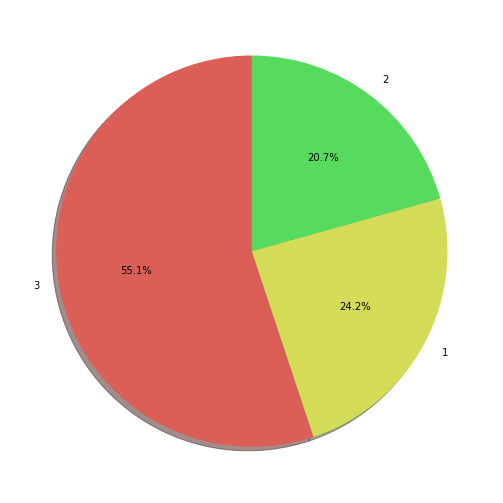

In [26]:
labels=ticket_class.index
sizes=ticket_class.values
plt.figure(figsize=(12,9))
colors=sns.color_palette('hls')
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,colors=colors,startangle=90)
plt.show()

extracting status from 'Name' column

In [27]:
df['Name'].map(lambda row: row.split(',')[1].split('.')[0])

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: Name, Length: 891, dtype: object

we can count every status

In [28]:
df['Name'].map(lambda row: row.split(',')[1].split('.')[0]).value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Name, dtype: int64

Using data visualization we can see number of status 

In [29]:
status=df['Name'].map(lambda row: row.split(',')[1].split('.')[0]).value_counts()

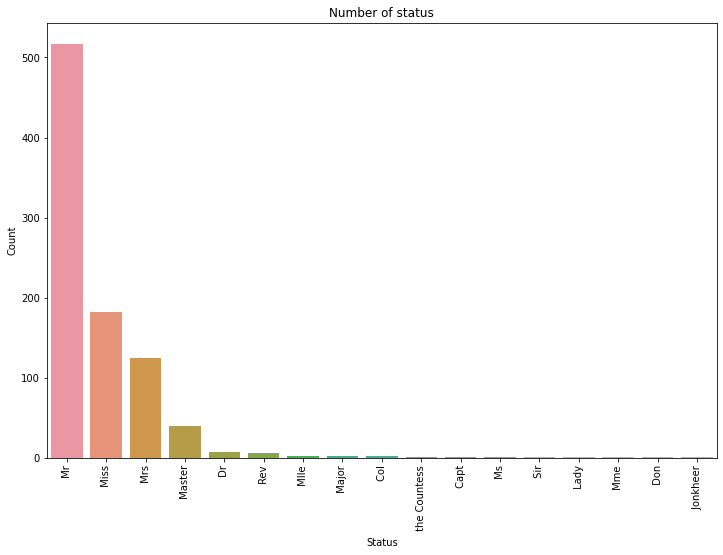

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(x=status.index, y=status.values)
plt.title('Number of status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

we can find outliers of column

In [31]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

LET's see data with outliers using boxplot 

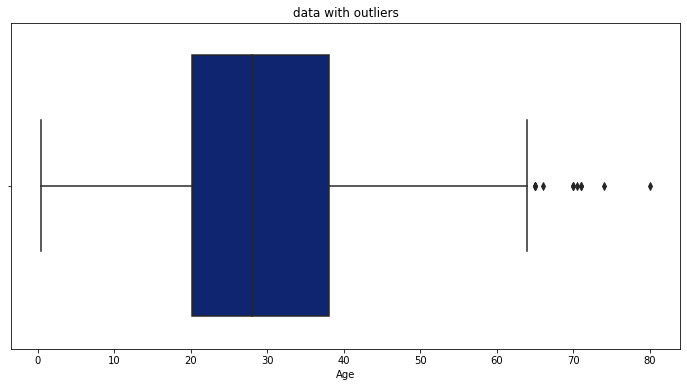

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Age'])
plt.title('data with outliers')
plt.show()

In [33]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [34]:
df['Age'].median()

28.0

In [35]:
def out_bound(df, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    return lower_bound, upper_bound

In [36]:
print(out_bound(df, 'Age'))

(-6.6875, 64.8125)


We can remove also replace outliers.Removing will reduce the shape of data,
but replacing wil not reduce the shape of data. 
You can choose to work one of them.It is up to you.

# Remove outliers

In [37]:
def remove_outliers(data, col):
    l_b, u_b=out_bound(data, col)
    
    return data[ (data[col]>l_b) & (data[col]<u_b) ]

In [38]:
data1=remove_outliers(df, 'Age')

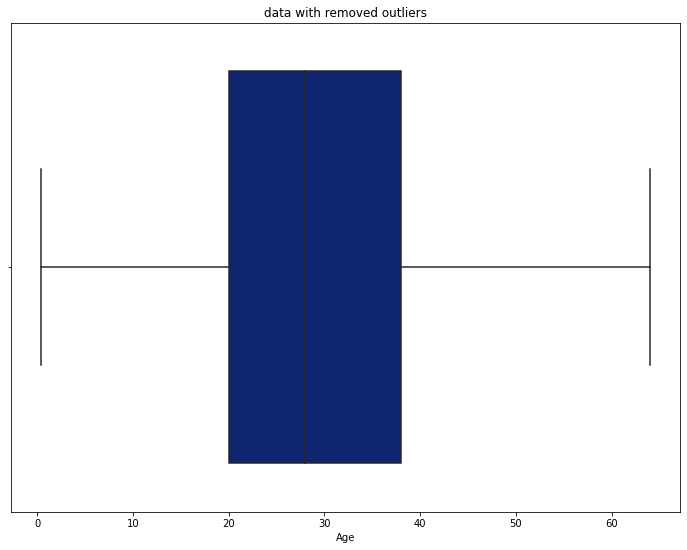

In [39]:
plt.figure(figsize=(12,9))
sns.boxplot(data1['Age'])
plt.title('data with removed outliers')
plt.show()

# Replace outliers

In [40]:
def outliers_equal_bounds(data, col):
    l_b, u_b=out_bound(data, col)
    
    data.loc[(data[col]<l_b), col]=l_b
    data.loc[(data[col]>u_b), col]=u_b
    
    return data
    

In [41]:
data2=outliers_equal_bounds(df, 'Age')

Let's see data with replaced outliers

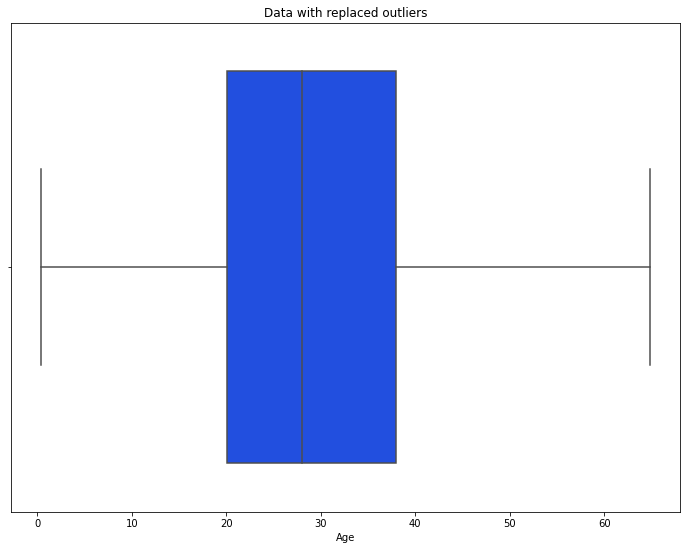

In [42]:
sns.set_palette('bright')
plt.figure(figsize=(12,9))
sns.boxplot(data2['Age'])
plt.title('Data with replaced outliers')
plt.show()

In [43]:
print('Real data:', df.shape)
print('Data with removed outliers by age:', data1.shape)
print('Data with replaced outliers by age:', data2.shape)

Real data: (891, 11)
Data with removed outliers by age: (703, 11)
Data with replaced outliers by age: (891, 11)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


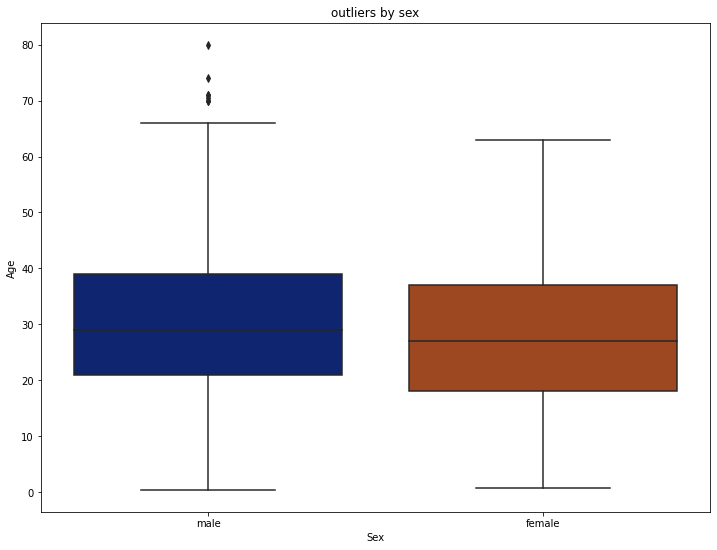

In [45]:
sns.set_palette('dark')
plt.figure(figsize=(12,9))
sns.boxplot(x='Sex', y='Age', data=df_copy)
plt.title('outliers by sex')
plt.show()

In [46]:
df_copy['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

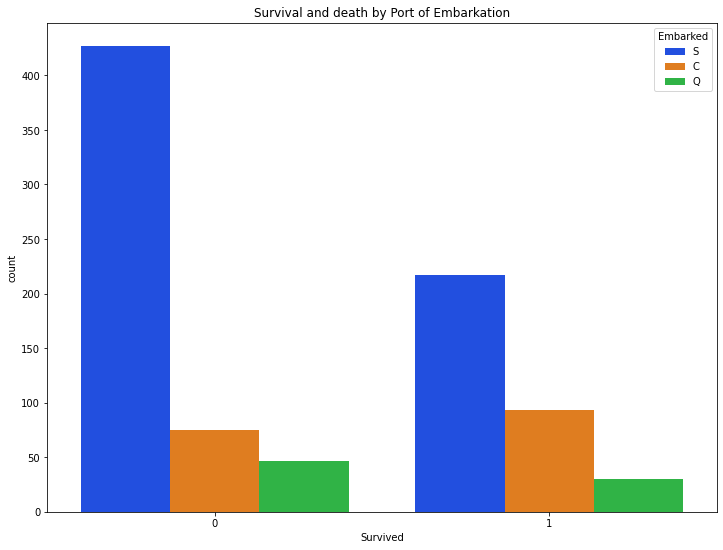

In [47]:
sns.set_palette('bright')
plt.figure(figsize=(12,9))
plt.title('Survival and death by Port of Embarkation')
sns.countplot(x='Survived', hue='Embarked', data=df_copy)
plt.show()

We can see death and survived values by embarked

In [48]:
df_copy.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [49]:
df_copy['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [50]:
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [51]:
df_copy['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

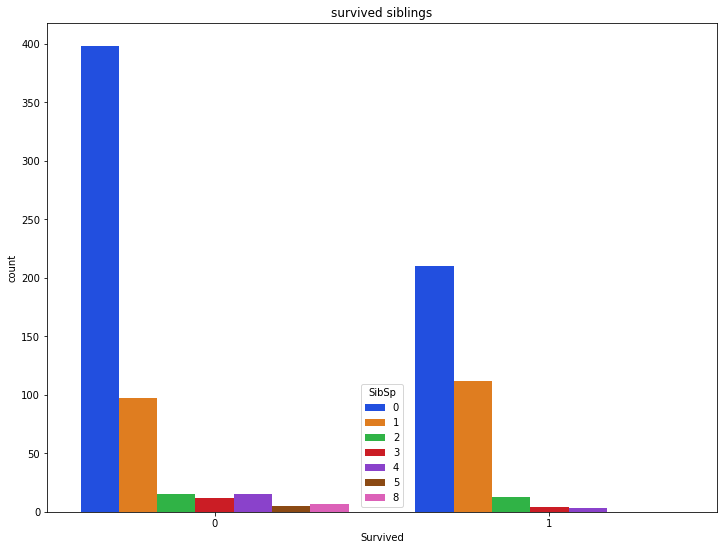

In [52]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived', hue='SibSp', data=df_copy)
plt.title('survived siblings')
plt.show()

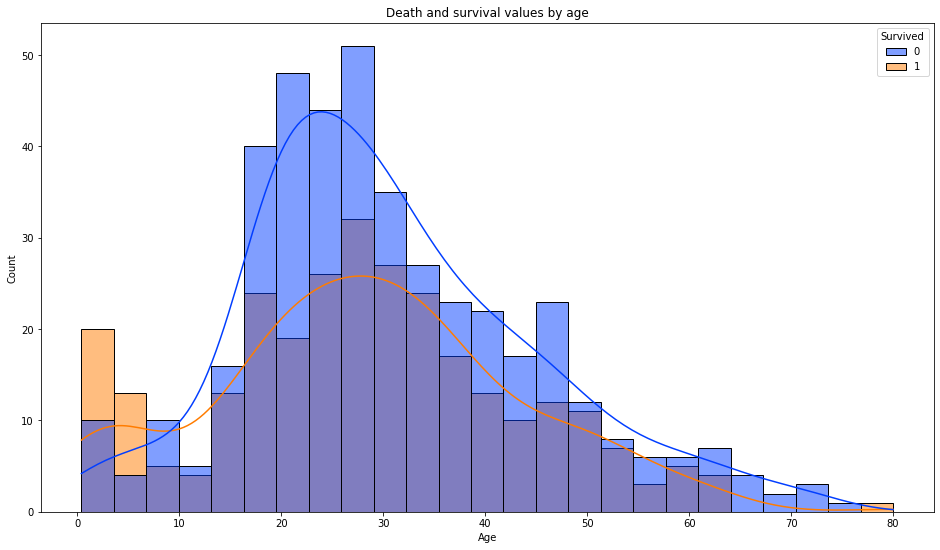

In [53]:
fig, ax1 = plt.subplots(figsize=(16, 9))
sns.set_palette('bright')
sns.histplot(data = df_copy, x='Age', ax=ax1, bins=25, hue='Survived', kde=True)
plt.title('Death and survival values by age')
plt.show()


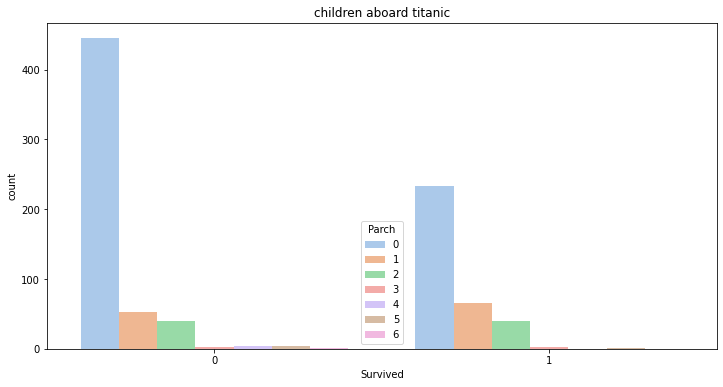

In [54]:
sns.set_palette('pastel')
plt.figure(figsize=(12,6))
sns.countplot(x='Survived', hue='Parch', data=df_copy)
plt.title('children aboard titanic')
plt.show()

In [55]:
survived=df['Survived'].value_counts()
print(survived)

0    549
1    342
Name: Survived, dtype: int64


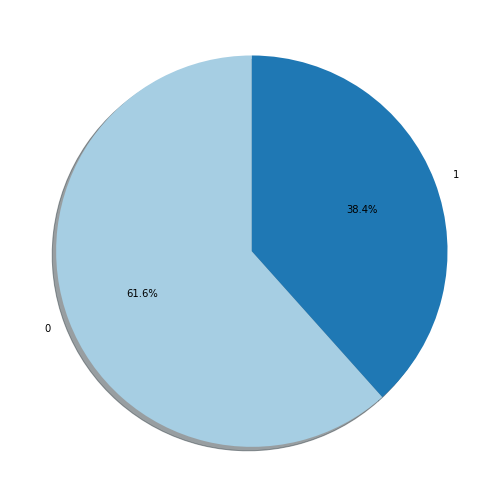

In [56]:
labels=survived.index
sizes=survived.values
plt.figure(figsize=(12,9))
colors = sns.color_palette('Paired')
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,colors=colors,startangle=90)
plt.show()

In [57]:
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


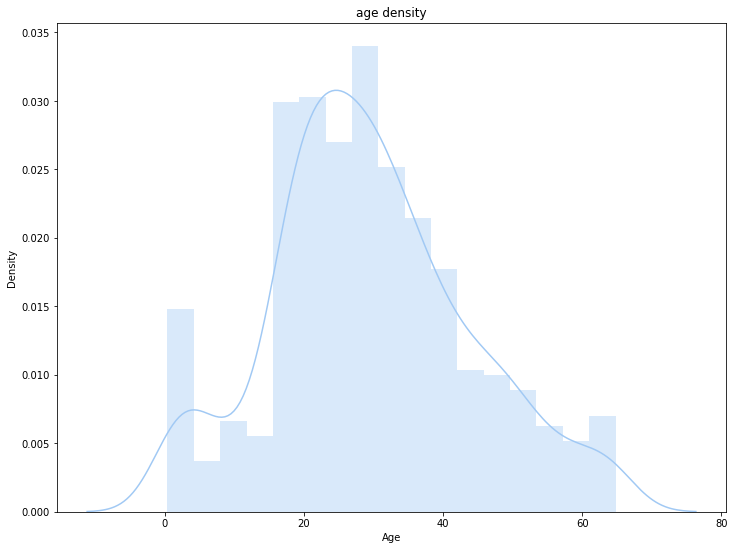

In [58]:
plt.figure(figsize=(12,9))
sns.distplot(df['Age'])
plt.title('age density')
plt.show()

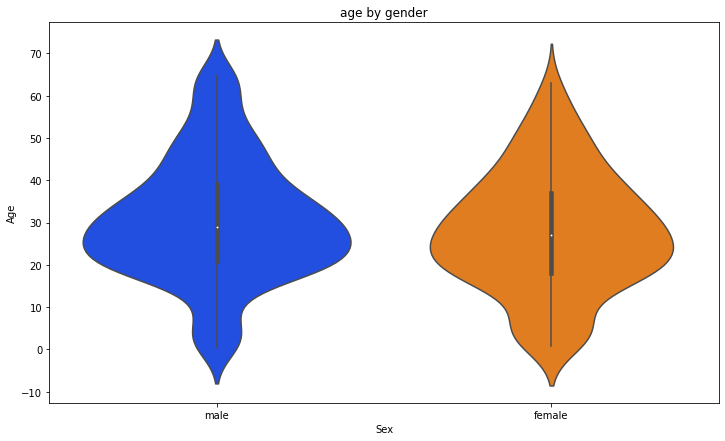

In [59]:
plt.figure(figsize=(12,7))
sns.set_palette('bright')
sns.violinplot(x=df['Sex'],y=df['Age'])
plt.title('age by gender')
plt.show()

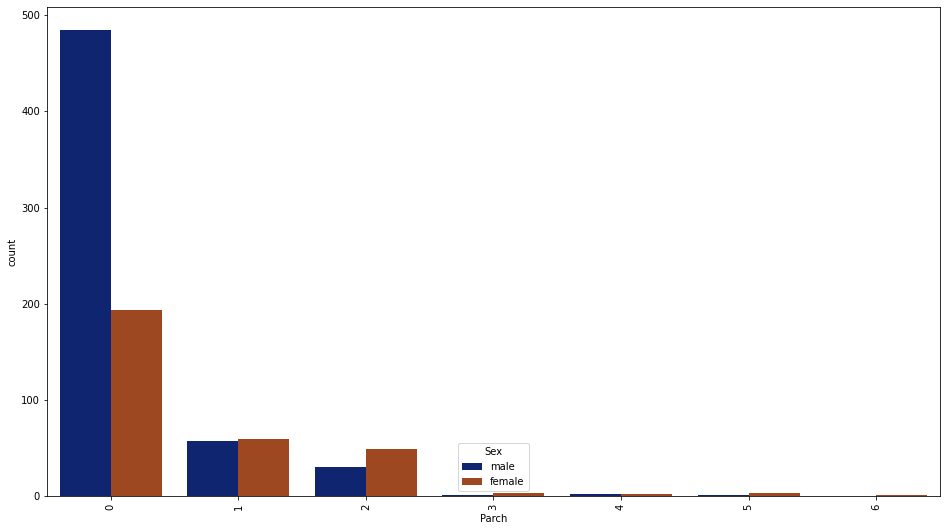

In [60]:
sns.set_palette('dark')
plt.figure(figsize=(16,9))
sns.countplot(x='Parch', hue='Sex', data=df)
plt.xticks(rotation=90)
plt.show()

In [61]:
df_copy.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [62]:
corr=df_copy.corr()

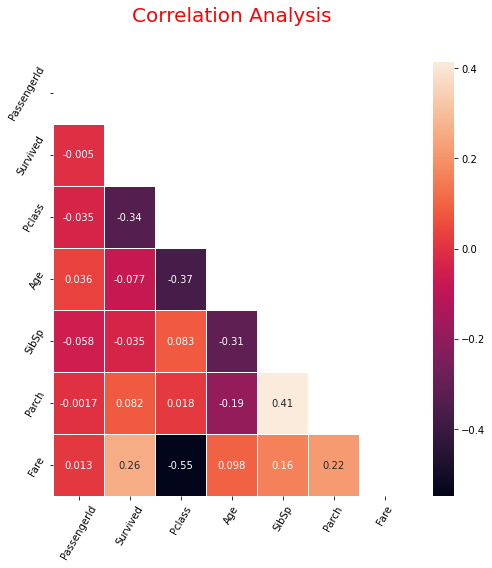

In [63]:
plt.figure(figsize=(8,8))
plt.title('Correlation Analysis',color='Red',fontsize=20,pad=40)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(df.corr(), mask=mask, annot=True, linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

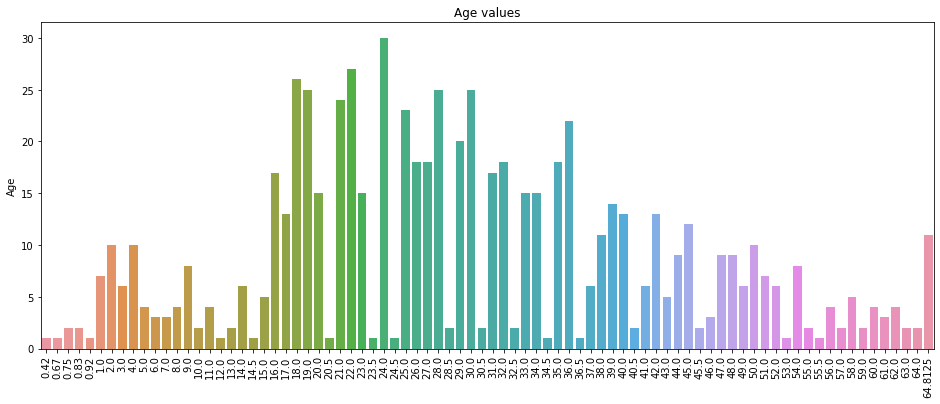

In [64]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df['Age'].value_counts().index, y=df['Age'].value_counts())
plt.title('Age values')
plt.xticks(rotation=90)
plt.show()

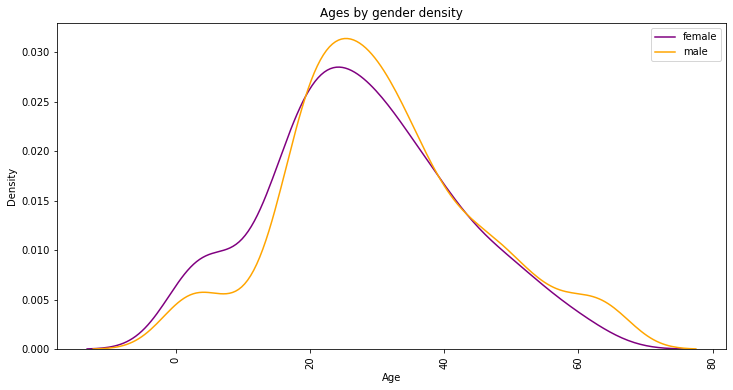

In [65]:
plt.figure(figsize=(12,6))
sns.kdeplot(df[df['Sex']=='female']['Age'], color='purple', label='female')
sns.kdeplot(df[df['Sex']=='male']['Age'], color='orange', label='male')
plt.title('Ages by gender density')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()